In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math as m
from matplotlib.animation import FuncAnimation, PillowWriter

def val_by_chances(chances=[0.5, 0.5], equal=False):
    if(equal):
        limit = int(chances[0]*100)*len(chances) -1
    else:
        limit = 99
        
    choice = []
    for i in range(len(chances)):
        choice = np.concatenate((choice, np.full(int(chances[i]*100), i)))

    # print(limit, choice)
    return int(choice[random.randint(0,limit)])


# coefs = [[a, b, c, d, e, f], [a, b, c, d, e, f], ...]
def xy_set_differ(coefs, chance=[], iter=10000, angular=False):
    if(len(chance)==0):
        chance = [1/len(coefs)]*len(coefs)
        equal = True
    else:
        equal = False
        
    values = np.array([[0,0,0]])
    if(not angular):
        for i in range(iter):
            choice = val_by_chances(chance, equal=equal)
            x = (values[-1])[0]*coefs[choice][0] + (values[-1])[1]*coefs[choice][1] + coefs[choice][4]
            y = (values[-1])[0]*coefs[choice][2] + (values[-1])[1]*coefs[choice][3] + coefs[choice][5]
            values = np.vstack((values, [x,y,0]))
    else:
        for i in range(iter):
            choice = val_by_chances(chance, equal=equal)
            x = (values[-1])[0]*coefs[choice][0]*m.cos(coefs[choice][2]) - (values[-1])[1]*coefs[choice][1]*m.sin(coefs[choice][3]) + coefs[choice][4]
            y = (values[-1])[0]*coefs[choice][0]*m.sin(coefs[choice][2]) + (values[-1])[1]*coefs[choice][1]*m.cos(coefs[choice][3]) + coefs[choice][5]
            values = np.vstack((values, [x,y,0]))
    return values

In [2]:
def paint_with_anima(coefs, chance=[], iter=10000, step=100, name='name_not_given', angular=False):
    values = xy_set_differ(coefs, chance=chance, iter=iter, angular=angular)
    fig, ax = plt.subplots()
    def update(frame):
        frame = frame * step
        ax.clear()
        x, y = values[:frame, 0], values[:frame, 1]
        ax.scatter(x, y, s=0.1)
    
    ani = FuncAnimation(fig=fig, func=update, frames=iter//step, interval=30)
    ani.save('gifs/'+name+'.gif', writer=PillowWriter(fps=30))
    # plt.show()


# 1.4

## 1.4.1. Кленовий лист

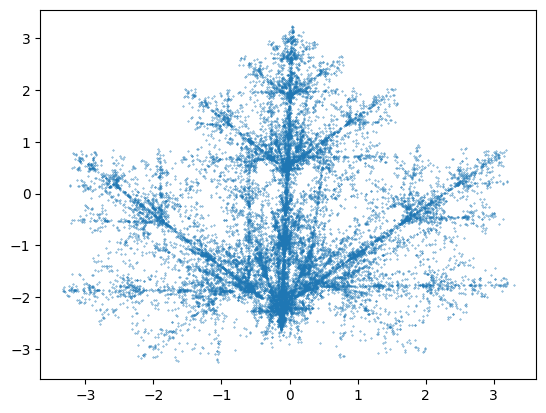

In [3]:
# maple leaf
coefs = np.array([[0.14, 0.01, 0, 0.51, -0.08, -1.31],
                  [0.43, 0.52, -0.45, 0.5, 1.49, -0.75],
                  [0.45, -0.49, 0.47, 0.47, -1.62, -0.74],
                  [0.49, 0, 0, 0.51, 0.02, 1.62]])

# vals = xy_set_differ(coefs, iter=50000)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, iter=20000, name='maple leaf')

<img src="gifs/maple leaf.gif" width="600">

## 1.4.2. Спіраль

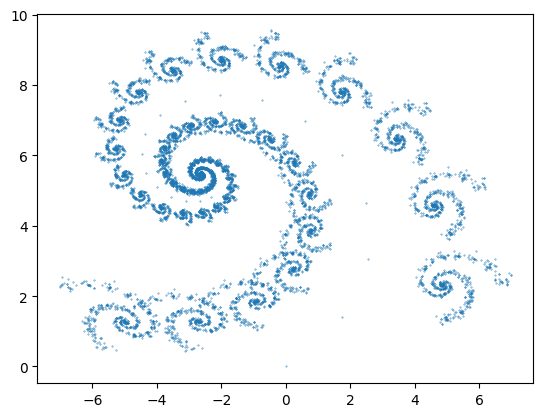

In [4]:
# spiral
coefs = np.array([[0.787879, -0.121212, 0.181818],
                [-0.424242, 0.257576, -0.136364],
                [0.242424, 0.151515, 0.090909],
                [0.859848, 0.053030, 0.181818],
                [1.758647, -6.721654, 6.086107],
                [1.408065, 1.377236, 1.568035]]).T

chances = [0.9, 0.05, 0.05]

# vals = xy_set_differ(coefs, chances, iter=20000)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, chances, iter=10000, name='spiral')

<img src="gifs/spiral.gif" width='400'>

## 1.4.3. Mandelbrot-like

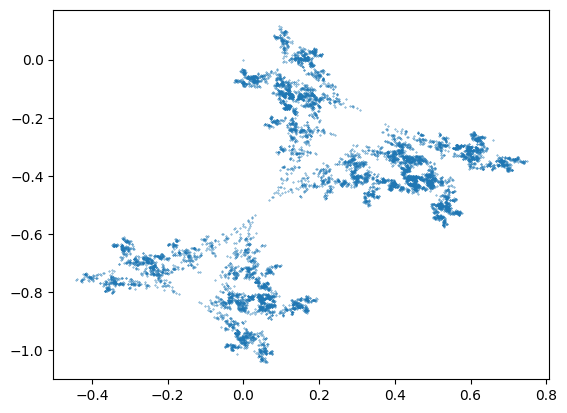

In [5]:
# Maplebrot
coefs = np.array([[0.2020, 0.1380],
                [-0.8050, 0.6650],
                [-0.6890, -0.5020],
                [-0.3420, -0.2220],
                [-0.3730, 0.6600],
                [-0.6530, -0.2770]]).T

# vals = xy_set_differ(coefs)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, iter=10000, name='mandelbrot-like')

<img src="gifs/mandelbrot-like.gif" width="400">

## 1.4.4. Фрактальне дерево

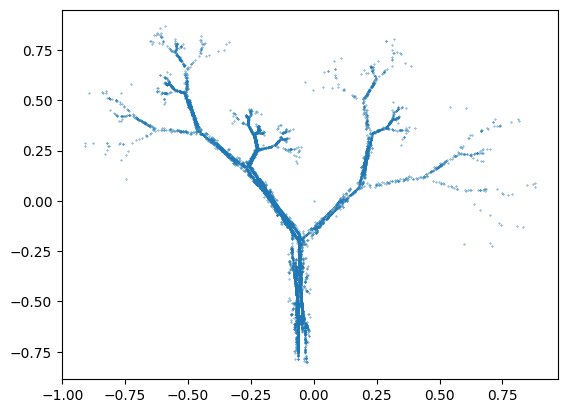

In [6]:
# Fractal Tree
coefs = np.array([[0.0500, -0.0500, 0.0300, -0.0300, 0.5600, 0.1900, -0.3300],
                [0.0000, 0.0000, -0.1400, 0.1400, 0.4400, 0.0700, -0.3400],
                [0.0000, 0.0000, 0.0000, 0.0000, -0.3700, -0.1000, -0.3300],
                [0.4000, -0.4000, 0.2600, -0.2600, 0.5100, 0.1500, 0.3400],
                [-0.060, -0.0600, -0.1600, -0.1600, 0.3000, -0.2000, -0.5400],
                [-0.4700, -0.4700, -0.0100, -0.0100, 0.1500, 0.2800, 0.3900]]).T

# vals = xy_set_differ(coefs, iter=10000)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, iter=10000, name='Fractal Tree')

<img src="gifs/Fractal Tree.gif" width="400">

## 1.4.5. Другий варіант фрактального дерева

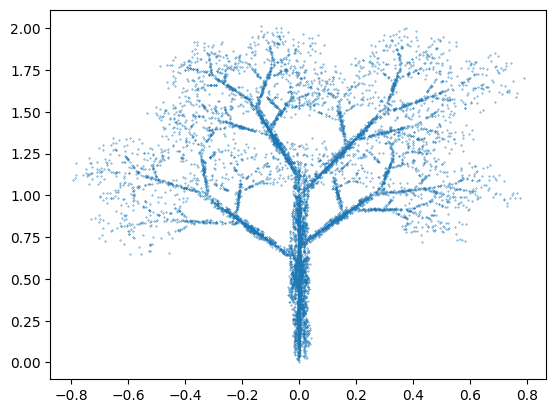

In [7]:
coefs = np.array([
    [0.0500, 0.0500, 0.6000, 0.5000, 0.5000, 0.5500],
    [0.6000, -0.5000, 0.5000, 0.4500, 0.5500, 0.4000],
    [0.0000, 0.0000, 0.6980, 0.3490, -0.5240, -0.6980],
    [0.0000, 0.0000, 0.6980, 0.3492, -0.5240, -0.6980],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
    [0.0000, 1.0000, 0.6000, 1.1000, 1.0000, 0.7000]
]).T

# vals = xy_set_differ(coefs, iter=30000, angular=True)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, iter=10000, name='Second Fractal Tree', angular=True)

<img src="gifs/Second Fractal Tree.gif" width="400">

## 1.4.6. Третій варіант фрактального дерева

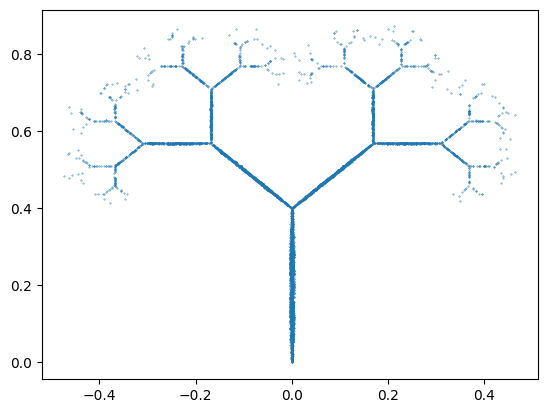

In [8]:
coefs = np.array([[0.0100, -0.0100, 0.4200, 0.4200],
                [0.0000, 0.0000, -0.4200, 0.4200],
                [0.0000, 0.0000, 0.4200, -0.4200],
                [0.4500, -0.4500, 0.4200, 0.4200],
                [0.0000, 0.0000, 0.0000, 0.0000],
                [0.0000, 0.4000, 0.4000, 0.4000]]).T

# vals = xy_set_differ(coefs, iter=10000)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, iter=10000, name='Third Fractal Tree')

<img src="gifs/Third Fractal Tree.gif" width="400">

## 1.4.7. Четвертий варіант фрактального дерева

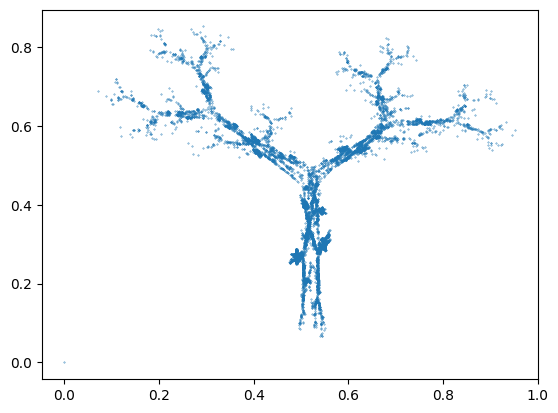

In [9]:
coefs = np.array([[0.1950, 0.4620, -0.6370, -0.0350, -0.0580],
                [-0.4880, 0.4140, 0.0000, 0.0700, -0.0700],
                [0.3440, -0.2520, 0.0000, -0.4690, 0.4530],
                [0.4430, 0.3610, 0.5010, 0.0220, -0.1110],
                [0.4431, 0.2511, 0.8562, 0.4884, 0.5976],
                [0.2452, 0.5692, 0.2512, 0.5069, 0.0969]]).T

# vals = xy_set_differ(coefs, iter=10000)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, iter=10000, name='Forth Fractal Tree')

<img src="gifs/Forth Fractal Tree.gif" width="400">

## 1.4.8. Фрактальний лист

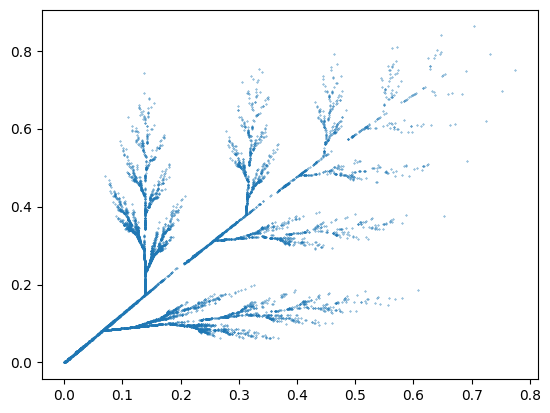

In [10]:
coefs = np.array([[0.0000, 0.7248, 0.1583, 0.3386],
                [0.2439, 0.0337, -0.1297, 0.3694],
                [0.0000, -0.0253, 0.3550, 0.2227],
                [0.3053, 0.7426, 0.3676, -0.0756],
                [0.0000, 0.2060, 0.1383, 0.0679],
                [0.0000, 0.2538, 0.1750, 0.0826]]).T

# vals = xy_set_differ(coefs, iter=20000)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, iter=10000, name='Fractal leaf')

<img src="gifs/Fractal leaf.gif" width="400">

## 1.4.9. Фрактал пісочний долар-сніжинка

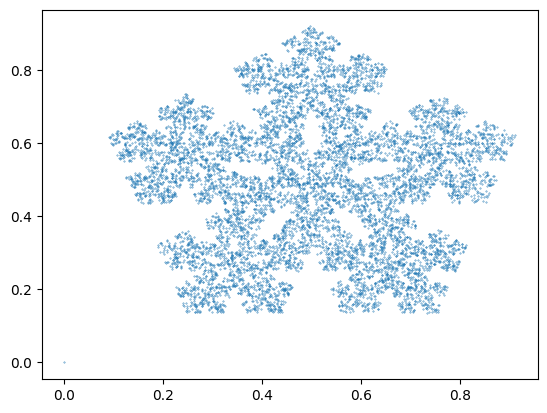

In [11]:
coefs = np.array([
    [0.38200, 0.11800, 0.11800, -0.30900, -0.30900, 0.38200],
    [0.00000, -0.36330, 0.36330, -0.22450, 0.22450, 0.00000],
    [0.00000, 0.36330, -0.36330, 0.22450, -0.22450, 0.00000],
    [0.38200, 0.11800, 0.11800, -0.30900, -0.30900, -0.38200],
    [0.30900, 0.36330, 0.51870, 0.60700, 0.70160, 0.30900],
    [0.57000, 0.33060, 0.69400, 0.30900, 0.53350, 0.67700]
]).T

# vals = xy_set_differ(coefs, iter=10000)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, iter=10000, name='Fractal Sand Dollar')

<img src="gifs/Fractal Sand Dollar.gif" width="400">

## 1.4.10. Фрактал папороті

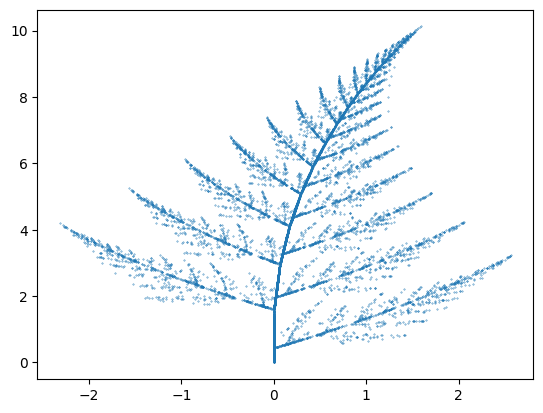

In [12]:
coefs = np.array([
    [0.0, 0.2, -0.15, 0.75],
    [0.0, -0.26, 0.28, 0.04],
    [0.0, 0.23, 0.26, -0.04],
    [0.16, 0.22, 0.24, 0.85],
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 1.6, 0.44, 1.6]
]).T

chances = [0.1, 0.08, 0.08, 0.74]

# vals = xy_set_differ(coefs, chances, iter=10000)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, chances, iter=10000, name='Paporot')

<img src="gifs/Paporot.gif" width="400">

# 1.5

## 1.5.1. IFS Chaos Text

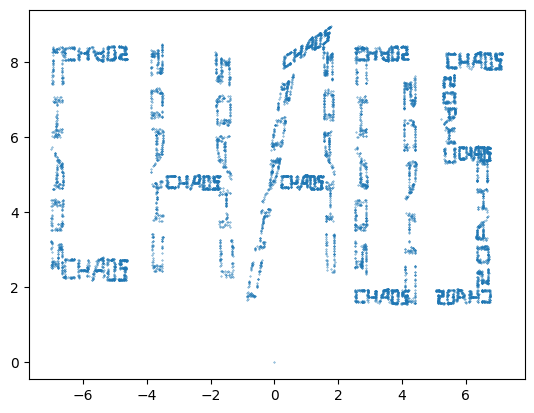

In [13]:
coefs = np.array([
    [0, 0.053, -0.429, 0, -7.083, 5.43],
    [0.143, 0, 0, -0.053, -5.619, 8.513],
    [0.143, 0, 0, 0.083, -5.619, 2.057],
    [0, 0.053, 0.429, 0, -3.952, 5.43],
    [0.119, 0, 0, 0.053, -2.555, 4.536],
    [-0.0123806, -0.0649723, 0.423819, 0.00189797, -1.226, 5.235],
    [0.0852291, 0.0506328, 0.420449, 0.0156626, -0.421, 4.569],
    [0.104432, 0.00529117, 0.0570516, 0.0527352, 0.976, 8.113],
    [-0.00814186, -0.0417935, 0.423922, 0.00415972, 1.934, 5.37],
    [0.093, 0, 0, 0.053, 0.861, 4.536],
    [0, 0.053, -0.429, 0, 2.447, 5.43],
    [0.119, 0, 0, -0.053, 3.363, 8.513],
    [0.119, 0, 0, 0.053, 3.363, 1.487],
    [0, 0.053, 0.429, 0, 3.972, 4.569],
    [0.123998, -0.00183957, 0.000691208, 0.0629731, 6.275, 7.716],
    [0, 0.053, 0.167, 0, 5.215, 6.483],
    [0.071, 0, 0, 0.053, 6.279, 5.298],
    [0, -0.053, -0.238, 0, 6.805, 3.714],
    [-0.121, 0, 0, 0.053, 5.941, 1.487]
])

# vals = xy_set_differ(coefs, iter=10000)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, iter=10000, name='Chaos')

<img src="gifs/Chaos.gif" width="400">

## 1.5.2. IFS Dragon

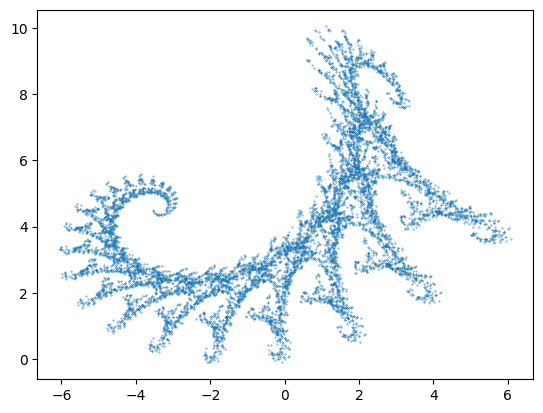

In [14]:
coefs = np.array([
    [0.824074, 0.088272],
    [0.281428, 0.520988],
    [-0.212346, -0.463889],
    [0.864198, -0.377778],
    [-1.882290, 0.785360],
    [-0.110607, 8.095795]
]).T

chances = [0.8, 0.2]

# vals = xy_set_differ(coefs, chances)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, chances, name='IFS dragon')

<img src="gifs/IFS dragon.gif" width="400">

## 1.5.3. IFS Гілка

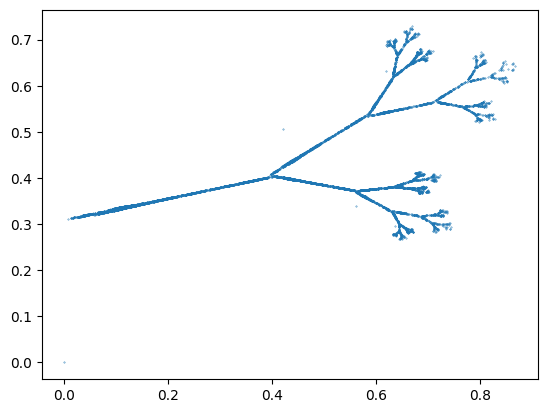

In [15]:
coefs = np.array([
    [0.387, 0.441, -0.468],
    [0.430, -0.091, 0.020],
    [0.430, -0.009, -0.113],
    [-0.387, -0.322, 0.015],
    [0.2560, 0.4219, 0.4],
    [0.5220, 0.5059, 0.4]
]).T

# vals = xy_set_differ(coefs, iter=10000)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, iter=10000, name='IFS branch')

<img src="gifs/IFS branch.gif" width="400">

## 1.5.4. IFS Ялинка

In [ ]:
coefs = np.array([
    [0.0, 0.0, 0.5],
    [-0.5, 0.5, 0.0],
    [0.5, -0.5, 0.0],
    [0.0, 0.0, 0.5],
    [0.5, 0.5, 0.25],
    [0.0, 0.5, 0.5]
]).T

# vals = xy_set_differ(coefs, iter=10000)
# plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
# plt.show()
paint_with_anima(coefs, iter=10000, name='IFS tree')

<img src="gifs/IFS tree.gif" width="400">

# Self

## 1

In [ ]:
coefs = np.array([
                 [0.2, 0.2, -0.1, 0.1, -0.8, 0.8]
                ,[0.1, -0.9,  0.7, -0.7, 0.3, 0.3] 
])


vals = xy_set_differ(coefs, iter=30000)
plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
plt.show()

## 2

In [ ]:
coefs = np.array([
                 [0.2, 0.2, -0.1, 0.1, -0.8, 0.8]
                ,[0.1, 0.9, -0.7, -0.8, 0.3, 0.3] 
])


vals = xy_set_differ(coefs, iter=20000)
plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
plt.show()

## 3

In [ ]:
coefs = np.array([
                [ 1, -1,  0.5, -0.5,  0.5,  -0.8],
                [-0.2,  0.8,  -0.8,  0.2, -0.8,  0.8]
])


vals = xy_set_differ(coefs, iter=20000)
plt.scatter(vals[:, 0], vals[:, 1], s=0.1)
plt.show()